# Kenya Agricultural Market Insights and Forecasting System with Sentiment Analysis Project

## BUSINESS UNDERSTANDING

### Business Overview
Economic and livelihood concerns are critical issues in Kenya, impacting a substantial portion of the population. The agricultural sector, which is a major contributor to Kenya's economy, faces numerous challenges, including price volatility, market inefficiencies, and fluctuating public sentiment. These issues directly affect farmers' and traders' livelihoods, making it essential to develop data-driven solutions to address these concerns.


##### Stakeholders and Their Gains
1. Farmers (Small-Scale & Large-Scale)

🔹 Gains:

- Informed decisions on when and where to sell their produce for maximum profit.
- Insights into seasonal price trends to optimize crop production cycles.
- Awareness of public sentiment that may impact market demand.

2. Traders & Distributors (Wholesalers & Retailers)

🔹 Gains:

- Forecasting tools to plan optimal buying and selling times.
- Reduction in losses due to unexpected price drops.
- Better logistics planning by analyzing regional price variations.

3. Policymakers & Government Agencies (Ministry of Agriculture, KNBS, NDMA, etc.)

🔹 Gains:

- Data-backed policy formulation for price stabilization and market interventions.
- Early warning systems for food security and drought preparedness.
- Understanding of market inefficiencies to improve agricultural policies.

4. Financial Institutions & Investors (Banks, Microfinance Institutions, Agribusiness Investors)

🔹 Gains:

- Credit risk assessment based on market trends and price stability.
- Informed decisions on investing in agriculture-related ventures.
- Development of agricultural insurance products based on price volatility analysis.

5. Consumers (General Public)

🔹 Gains:

- Awareness of expected price changes for household budgeting.
- More stable prices due to better market efficiency.
- Potential for lower food costs as market inefficiencies decrease.

6. Researchers & Data Scientists

🔹 Gains:

- A valuable dataset for further analysis and model improvements.
- Opportunities to develop new methodologies for price forecasting and sentiment analysis.
- Enhanced understanding of the relationship between social sentiment and economic trends.

### Problem Statement
Kenya's agricultural markets are characterized by significant price fluctuations across different regions and commodities. Factors such as seasonal variations, market demand, and public perception contribute to these fluctuations. For instance, maize prices can vary dramatically based on the time of year and the region, impacting farmers' decisions on when and where to sell their produce. Additionally, public sentiment, as expressed on social media platforms like Twitter, can influence market dynamics, further complicating the decision-making process for stakeholders.


### Main Objective
Develop a comprehensive system that leverages advanced data science techniques to analyze and forecast commodity prices, monitor market trends, and incorporate sentiment analysis. This system aims to provide actionable insights to farmers, traders, and policymakers, enabling informed decisions and improving market efficiency and stability. Time series forecasting will be achieved through graphical analysis. Regression analysis and sentiment analysis will play critical roles in predicting commodity prices and understanding public sentiment, respectively, thereby enhancing the overall accuracy and relevance of market predictions.


### Specific Objectives
1.	Assess Commodity Price Fluctuations

- Evaluate the price volatility of various commodities across different regions and time periods
- Identify the factors contributing to price fluctuations, such as seasonal variations, market demand, and public sentim

2.	Analyze Market Trends:
   
- Monitor market trend s and patterns in commodity prices using historical data and advanced analytics.
- Develop predictive models to forecast future market trends and price movements ent

3.	Incorporate Sentiment Analysis:

- Leverage sentiment analysis on social media data, particularly from Twitter, to assess public perception of agricultural markets. 
- Develop machine learning models to quantify the relationship between sentiment trends and commodity price fluctuations, enabling more accurate market predictions.

### Success Metrics

#### Forecasting Model Accuracy (Commodity Price Prediction)

| Metric | Target Range | Ideal Goal | Comments                                      |
|--------|--------------|------------|-----------------------------------------------|
| MAE    | 5–20 KES     | < 10 KES   | Lower values indicate better predictions.     |
| RMSE   | 10–30 KES    | < 15 KES   | Penalizes large errors more than MAE.         |
| R²     | 0.70–0.95    | > 0.85     | Higher values mean better model fit.          |

*Ideal Target:* MAE < 10 KES, RMSE < 15 KES, R² > 0.85  
(If commodity prices vary widely, normalize error metrics based on average price ranges.)

#### Sentiment Analysis Performance

| Metric    | Target Range | Ideal Goal | Comments                                                  |
|-----------|--------------|------------|-----------------------------------------------------------|
| Precision | 70–95%       | > 85%      | Measures how many positive sentiment predictions were correct. |
| Recall    | 65–90%       | > 80%      | Measures how well the model captures all positive sentiments.  |
| F1-Score  | 75–90%       | > 85%      | Balances precision and recall.                             |

*Ideal Target:* F1-Score > 85%, Precision & Recall > 80%

## Data understanding


The data used in this project originates from various sources, including historical commodity prices, geographical information, and sentiment data from social media platforms.

1. The primary dataset contains Food Prices data for Kenya, sourced from the Kenya Agricultural Market Information System [KAMIS](https://kamis.kilimo.go.ke/site/market?product=153&per_page=10), developed by the Ministry of Agriculture, Livestock, Fisheries, and Cooperatives. This database covers foods such as maize, rice, beans, fish, and sugar,is updated weekly(though mostly contains monthly data). The platform offers data on commodity prices, trade volumes, and market highlights

2. Geographical Information:

-	Data on the location and characteristics of different agricultural markets in Kenya.
-	Includes information on regional variations in market conditions and infrastructure.

3. Sentiment Data from Social Media:
    
- Data collected from social media platforms like Twitter, capturing public sentiment related to agricultural markets.
- Includes information on public perception, opinions,  and discussions about commodity prices and market dynamics.




## Understanding rows and columns of our data

In [2]:
#importing necessary libraries
import pandas as pd
import glob
import os
#from geopy.geocoders import Nominatim
import warnings
import time

# Ignore warnings
warnings.filterwarnings("ignore")

In [3]:
#load the data
wfpdata = pd.read_csv('Data\wfp_food_prices_ken.csv')
wfpdata.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041
3,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705


In [4]:
#getting an overview and summary of dataframe
wfpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12865 entries, 0 to 12864
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       12865 non-null  object
 1   admin1     12825 non-null  object
 2   admin2     12825 non-null  object
 3   market     12865 non-null  object
 4   latitude   12825 non-null  object
 5   longitude  12825 non-null  object
 6   category   12865 non-null  object
 7   commodity  12865 non-null  object
 8   unit       12865 non-null  object
 9   priceflag  12865 non-null  object
 10  pricetype  12865 non-null  object
 11  currency   12865 non-null  object
 12  price      12865 non-null  object
 13  usdprice   12865 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


From the above, it is found that the data has 12865 rows 14 columns of object datatype. 

In [5]:
#getting descriptive statistics of df
wfpdata.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,12865,12825,12825,12865,12825,12825,12865,12865,12865,12865,12865,12865,12865,12865
unique,229,8,22,63,62,62,9,48,14,3,3,2,5768,9408
top,15/04/2021,Rift Valley,Turkana,Nairobi,-1.283333,36.816667,cereals and tubers,Maize (white),KG,actual,Retail,KES,10,0.4625
freq,429,5352,2722,1108,1108,1108,5803,1303,5785,8002,6458,12864,312,21


The most common values in individual rows are displayed on the "top" column. Since all columns in the data are of object datatype, statistical information on the dataset cannot be displayed. 


In [6]:
'''
import requests
from bs4 import BeautifulSoup
import csv

# URL of the KAMIS page
url = 'https://kamis.kilimo.go.ke/site/market?product=73&per_page=50000'

# Send a GET request to the URL
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing the data
table = soup.find('table')

if table:
    # Extract table headers
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extract table rows
    rows = []
    for row in table.find_all('tr')[1:]:  # Skip the header row
        cells = row.find_all('td')
        row_data = [cell.text.strip() for cell in cells]
        rows.append(row_data)

    # Write data to CSV
    with open('beef.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(headers)  # Write headers
        writer.writerows(rows)    # Write data rows

    print('Data has been written to your specified csv')
else:
    print('No table found on the webpage.')

'''

"\nimport requests\nfrom bs4 import BeautifulSoup\nimport csv\n\n# URL of the KAMIS page\nurl = 'https://kamis.kilimo.go.ke/site/market?product=73&per_page=50000'\n\n# Send a GET request to the URL\nresponse = requests.get(url)\nresponse.raise_for_status()  # Ensure the request was successful\n\n# Parse the HTML content\nsoup = BeautifulSoup(response.text, 'html.parser')\n\n# Find the table containing the data\ntable = soup.find('table')\n\nif table:\n    # Extract table headers\n    headers = [header.text.strip() for header in table.find_all('th')]\n\n    # Extract table rows\n    rows = []\n    for row in table.find_all('tr')[1:]:  # Skip the header row\n        cells = row.find_all('td')\n        row_data = [cell.text.strip() for cell in cells]\n        rows.append(row_data)\n\n    # Write data to CSV\n    with open('beef.csv', 'w', newline='', encoding='utf-8') as file:\n        writer = csv.writer(file)\n        writer.writerow(headers)  # Write headers\n        writer.writerows(r

From the KAMIS website, were able to scrap data about different commodities as seperate excel files(CSV). The code below identifies all CSV files in the directory using glob, then iterates through each file, reading its contents -into individual Pandas DataFrames. These DataFrames are stored in a list and later concatenated into a single DataFrame (combined_df).


In [7]:
# Set the directory containing your CSV files
csv_directory = ".\\Data\\Products"  # Replace with the path to your directory

# Use glob to match all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

# Initialize an empty list to hold DataFrames
data_frames = []

# Iterate over the list of CSV files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Append the DataFrame to the list
    data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# printing part of the combined dataframe
combined_df

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Meat Beef,-,-,-,Mbale,-,600.00/Kg,1200.0,Vihiga,2025-02-11
1,Meat Beef,-,-,-,Mbale,550.00/Kg,600.00/Kg,2000.0,Vihiga,2025-02-06
2,Meat Beef,-,-,-,Mbale,500.00/Kg,600.00/Kg,2000.0,Vihiga,2025-01-31
3,Meat Beef,-,-,-,Mbale,-,700.00/Kg,900.0,Vihiga,2025-01-28
4,Meat Beef,-,-,-,Mbale,-,500.00/Kg,700.0,Vihiga,2025-01-22
...,...,...,...,...,...,...,...,...,...,...
288473,Beans (Yellow-Green),-,-,-,Gikomba,-,150.00/Kg,NaN,Nairobi,2021-05-24
288474,Beans (Yellow-Green),-,-,-,Eldama Ravine,100.00/Kg,120.00/Kg,300.0,Baringo,2021-05-24
288475,Beans (Yellow-Green),-,-,-,Kongowea,95.56/Kg,110.00/Kg,900.0,Mombasa,2021-05-24
288476,Beans (Yellow-Green),-,-,-,Makutano West Pokot,140.00/Kg,200.00/Kg,NaN,West-Pokot,2021-05-24


The combined dataframe encompanses different variety of foods over different markets in Kenya alongside their prices over a period of time. Their supply volume is also indicated. Combined, the dataframe spans 288478 rows and 10 columns. 

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Commodity       288478 non-null  object 
 1   Classification  288478 non-null  object 
 2   Grade           288478 non-null  object 
 3   Sex             288478 non-null  object 
 4   Market          288478 non-null  object 
 5   Wholesale       288478 non-null  object 
 6   Retail          288478 non-null  object 
 7   Supply Volume   175498 non-null  float64
 8   County          287917 non-null  object 
 9   Date            288478 non-null  object 
dtypes: float64(1), object(9)
memory usage: 22.0+ MB


The dataset contains 288,478 records and 10 columns. 9 columns contain text (object) datatype, 1 column (Supply Volume) contains numeric (float64) datatype. Supply Volume: Only 175,498 out of 288,478 rows have values. County: Almost complete, but 561 records have missing values. Other columns are fully populated, but some might contain placeholder values.

In [9]:
combined_df.describe()

,Supply Volume
count,1.754980e+05
mean,7.809961e+03
std,4.115118e+05
min,0.000000e+00
25%,5.000000e+02
50%,1.500000e+03
75%,4.300000e+03
max,1.000000e+08


The above indicates statistical description of the Supply Volume column in the dataset, since it is the only numerical column. 

## DATA CLEANING

In data cleaning, we will ensure the dataset is accurate, relevant, consistent, complete, and uniform. This involves verifying data points against trusted sources, removing inaccuracies and outliers, filtering out irrelevant information that does not help in our analysis. We will also address inconsistent data formats, check naming conventions, ensuring a uniform structure across datasets, as well as identifying and filling null values to achieve completeness.
These steps are vital in maintaining data quality.

In [10]:
'''
import pandas as pd
import time
from geopy.geocoders import Nominatim


# Specify the column name that contains the market names
location_column = 'Market'  # Adjust if your column name is different

# Initialize the geocoder with a custom user agent
geolocator = Nominatim(user_agent="geo_coordinates_app")

def get_coordinates(place):
    """
    Geocode a place in Kenya and return the latitude and longitude.
    If the location is not found, return (None, None).
    """
    try:
        location = geolocator.geocode(f"{place}, Kenya")  # Ensuring all searches are within Kenya
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding '{place}': {e}")
        return None, None

# Dictionary to cache geocoding results for markets
cache = {}

# Lists to store the latitude and longitude for each market
latitudes = []
longitudes = []
total = len(combined_df[location_column])

# Iterate over each market and log progress
for idx, place in enumerate(combined_df[location_column], start=1):
    print(f"Processing {idx}/{total}: {place}")
    
    # Check if this market's coordinates have already been retrieved
    if place in cache:
        lat, lon = cache[place]
    else:
        lat, lon = get_coordinates(place)
        cache[place] = (lat, lon)
        time.sleep(1)  # Pause to respect geocoder limits
    
    latitudes.append(lat)
    longitudes.append(lon)

# Add the 'latitude' and 'longitude' columns to the DataFrame
combined_df['latitude'] = latitudes
combined_df['longitude'] = longitudes

# Save the updated DataFrame to a new CSV file
combined_df.to_csv("combined_with_coordinates.csv", index=False)

print("Coordinates have been added and saved to 'combined_with_coordinates.csv'.")

'''

'\nimport pandas as pd\nimport time\nfrom geopy.geocoders import Nominatim\n\n\n# Specify the column name that contains the market names\nlocation_column = \'Market\'  # Adjust if your column name is different\n\n# Initialize the geocoder with a custom user agent\ngeolocator = Nominatim(user_agent="geo_coordinates_app")\n\ndef get_coordinates(place):\n    """\n    Geocode a place in Kenya and return the latitude and longitude.\n    If the location is not found, return (None, None).\n    """\n    try:\n        location = geolocator.geocode(f"{place}, Kenya")  # Ensuring all searches are within Kenya\n        if location:\n            return location.latitude, location.longitude\n        else:\n            return None, None\n    except Exception as e:\n        print(f"Error geocoding \'{place}\': {e}")\n        return None, None\n\n# Dictionary to cache geocoding results for markets\ncache = {}\n\n# Lists to store the latitude and longitude for each market\nlatitudes = []\nlongitudes = [

The Geopy library was used to convert market names into coordinates while ensuring all locations are within Kenya. To optimize performance, it stores previously searched locations in a cache to avoid redundant API calls. The script iterates through the dataset, processes each market, and adds the coordinates to new columns in the DataFrame. Finally, it saves the updated data to a CSV file named "combined_with_coordinates.csv" for further analysis.

In [11]:
# Loading the new combined dataset with coordinates
products_df = pd.read_csv('.\\Data\\combined_with_coordinates.csv')

In [12]:
# Looking at the data's info
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Commodity       288478 non-null  object 
 1   Classification  288478 non-null  object 
 2   Grade           288478 non-null  object 
 3   Sex             288478 non-null  object 
 4   Market          288478 non-null  object 
 5   Wholesale       288478 non-null  object 
 6   Retail          288478 non-null  object 
 7   Supply Volume   175498 non-null  float64
 8   County          287917 non-null  object 
 9   Date            288478 non-null  object 
 10  latitude        199401 non-null  float64
 11  longitude       199401 non-null  float64
dtypes: float64(3), object(9)
memory usage: 26.4+ MB


From the above, there are 12 rows and 288478 columns, with some columns having missing values. All columns are of object datatype except the longitude, latitude, and supply volume.

In [13]:
# Finding statistical description of numerical columns in the dataset
products_df.describe()

,Supply Volume,latitude,longitude
count,1.754980e+05,199401.000000,199401.000000
mean,7.809961e+03,-0.686573,36.237790
std,4.115118e+05,1.435692,1.794955
min,0.000000e+00,-4.622956,34.138607
25%,5.000000e+02,-1.166037,34.763182
50%,1.500000e+03,-0.274214,35.834422
75%,4.300000e+03,0.129513,37.250000
max,1.000000e+08,3.709823,55.454533


A commodity category mapping should be created to classify different commodities into broader food categories like vegetables and fruits, cereals and tubers, pulses and nuts, meat, fish and eggs, and milk and dairy. The mapping ensures consistency when analyzing or visualizing data. Using the .map() function, each commodity in the products_df DataFrame is assigned its respective category based on the dictionary. This step is crucial for easier aggregation, comparison, and trend analysis of different commodity groups in the dataset.

In [14]:
# Finding unique classifications on the products dataframe
products_df['Classification'].unique()

array(['-', 'White Maize', 'Mixed-Traditional', 'Yellow Maize', 'IRR',
       'Dola', 'Jembe', 'Hostess', 'Equatorial afya ugali', 'Ajab',
       'Amaize', '210(two ten)', 'Ugali Afya', 'Taifa', 'Soko',
       'Raha Premium', 'Pembe', 'Oryx', 'Ndovu', 'Mama', 'Jogoo wimbi',
       'Jogoo', 'Tajiri maize meal', 'Kifaru', 'Cosmo', 'Shujaa',
       'Posho Mill', 'Jimbi', 'Unga afya', 'Canna', 'Jamii',
       'Organic (cassava, sorghum &maize)', 'Twiga',
       'Organic (maize&cassava flour)',
       'Organic ( millet, sorghum & maize flour )', 'Kiki maize meal',
       'Supreme', 'Dried', 'Fried', 'Fresh', 'Fillet', 'Sindano',
       'Pishori'], dtype=object)

In [15]:
# Commodity categories mapping
commodity_category_mapping = {
    'Meat Beef': 'meat, fish and eggs',
    'Cabbages': 'vegetables and fruits',
    'Banana (Cooking)': 'vegetables and fruits',
    'Cowpea leaves (Kunde)': 'vegetables and fruits',
    'Cowpeas': 'pulses and nuts',
    'Dry Onions': 'vegetables and fruits',
    'Dry Maize': 'cereals and tubers',
    'Finger Millet': 'cereals and tubers',
    'Maize Flour': 'cereals and tubers',
    'Kales/Sukuma Wiki': 'vegetables and fruits',
    'Omena': 'meat, fish and eggs',
    'Red Irish potato': 'cereals and tubers',
    'Cow Milk(Processd)': 'milk and dairy',
    'Beans Red Haricot (Wairimu)': 'pulses and nuts',
    'Red Sorghum': 'cereals and tubers',
    'Rice': 'cereals and tubers',
    'Banana (Ripening)': 'vegetables and fruits',
    'Spinach': 'vegetables and fruits',
    'Wheat': 'cereals and tubers',
    'Beans (Yellow-Green)': 'pulses and nuts'
}
# Map commodities to categories
products_df['Category'] = products_df['Commodity'].map(commodity_category_mapping)

# Display the updated DataFrame
products_df.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date,latitude,longitude,Category
0,Meat Beef,-,-,-,Mbale,-,600.00/Kg,1200.0,Vihiga,2025-02-11,0.083501,34.720326,"meat, fish and eggs"
1,Meat Beef,-,-,-,Mbale,550.00/Kg,600.00/Kg,2000.0,Vihiga,2025-02-06,0.083501,34.720326,"meat, fish and eggs"
2,Meat Beef,-,-,-,Mbale,500.00/Kg,600.00/Kg,2000.0,Vihiga,2025-01-31,0.083501,34.720326,"meat, fish and eggs"
3,Meat Beef,-,-,-,Mbale,-,700.00/Kg,900.0,Vihiga,2025-01-28,0.083501,34.720326,"meat, fish and eggs"
4,Meat Beef,-,-,-,Mbale,-,500.00/Kg,700.0,Vihiga,2025-01-22,0.083501,34.720326,"meat, fish and eggs"


From analysis, the 'Sex' amd 'Grade' column are not necessary for our assessment, and hence should be dropped

In [16]:
products_df.drop(columns= ['Sex','Grade'], inplace=True,axis=1)

In [17]:
# Confirming they have been dropped
products_df.head()

,Commodity,Classification,Market,Wholesale,Retail,Supply Volume,County,Date,latitude,longitude,Category
0,Meat Beef,-,Mbale,-,600.00/Kg,1200.0,Vihiga,2025-02-11,0.083501,34.720326,"meat, fish and eggs"
1,Meat Beef,-,Mbale,550.00/Kg,600.00/Kg,2000.0,Vihiga,2025-02-06,0.083501,34.720326,"meat, fish and eggs"
2,Meat Beef,-,Mbale,500.00/Kg,600.00/Kg,2000.0,Vihiga,2025-01-31,0.083501,34.720326,"meat, fish and eggs"
3,Meat Beef,-,Mbale,-,700.00/Kg,900.0,Vihiga,2025-01-28,0.083501,34.720326,"meat, fish and eggs"
4,Meat Beef,-,Mbale,-,500.00/Kg,700.0,Vihiga,2025-01-22,0.083501,34.720326,"meat, fish and eggs"


In [18]:
#Handling missing values
#Checking for nulls
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

percentage of nulls 
 Commodity          0.000000
Classification     0.000000
Market             0.000000
Wholesale          0.000000
Retail             0.000000
Supply Volume     39.164165
County             0.194469
Date               0.000000
latitude          30.878265
longitude         30.878265
Category           0.000000
dtype: float64


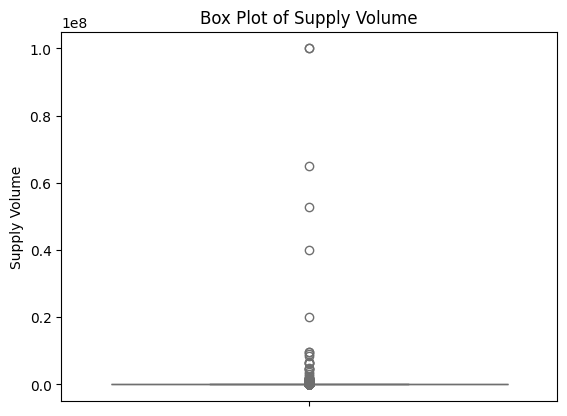

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=products_df['Supply Volume'], color='skyblue').set(title='Box Plot of Supply Volume', ylabel='Supply Volume')
plt.show();

Since Supply Volume column has the highest count of missing values, we decided to investigate its distribution since its numerical.From our findings, we concluded that the distribution is skewed and decided to impute the missing values with the median.

In [20]:
products_df['Supply Volume'].value_counts()

Supply Volume
2000.0     7565
1000.0     6863
500.0      5772
1500.0     5577
5000.0     5444
           ... 
4348.0        1
26450.0       1
2799.0        1
2034.0        1
985.0         1
Name: count, Length: 2503, dtype: int64

In [21]:
supply_count=products_df['Supply Volume'] > 1e+05
supply_count.value_counts()

Supply Volume
False    287946
True        532
Name: count, dtype: int64

In [22]:
#products_df['Supply Volume']=products_df['Supply Volume'] > 1e+05
products_df.drop(products_df[products_df['Supply Volume'] > 1e+05].index, inplace=True)

In [23]:
#products_df['Supply Volume'] > 1e+05
supply_count1=products_df['Supply Volume'] > 1e+05
supply_count1.value_counts()

Supply Volume
False    287946
Name: count, dtype: int64

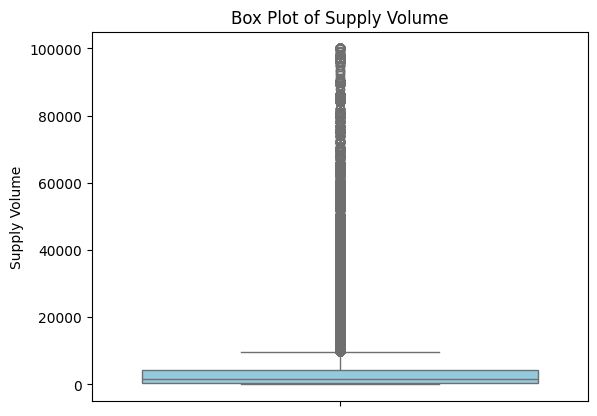

In [24]:
sns.boxplot(y=products_df['Supply Volume'], color='skyblue').set(title='Box Plot of Supply Volume', ylabel='Supply Volume')
plt.show();

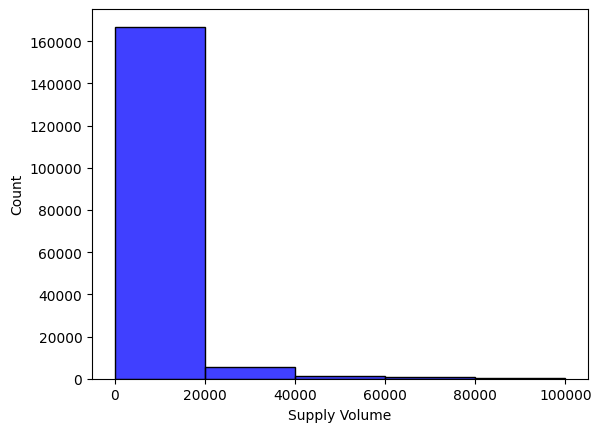

In [25]:
sns.histplot(products_df['Supply Volume'], bins=5, color='blue')
plt.show();

In [26]:
products_df['Supply Volume']=products_df['Supply Volume'].fillna(products_df['Supply Volume'].median())

In [27]:
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

percentage of nulls 
 Commodity          0.000000
Classification     0.000000
Market             0.000000
Wholesale          0.000000
Retail             0.000000
Supply Volume      0.000000
County             0.193439
Date               0.000000
latitude          30.917255
longitude         30.917255
Category           0.000000
dtype: float64


Checked for any missing values in the Products dataset and found 4 columns had mising values. They include: Supply volume-39%, Latitude and Longitude at 31% each and County had 0.2%.

In [28]:
products_df=products_df.dropna(axis=0).reset_index()

In [29]:
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

percentage of nulls 
 index             0.0
Commodity         0.0
Classification    0.0
Market            0.0
Wholesale         0.0
Retail            0.0
Supply Volume     0.0
County            0.0
Date              0.0
latitude          0.0
longitude         0.0
Category          0.0
dtype: float64


In [30]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198921 entries, 0 to 198920
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           198921 non-null  int64  
 1   Commodity       198921 non-null  object 
 2   Classification  198921 non-null  object 
 3   Market          198921 non-null  object 
 4   Wholesale       198921 non-null  object 
 5   Retail          198921 non-null  object 
 6   Supply Volume   198921 non-null  float64
 7   County          198921 non-null  object 
 8   Date            198921 non-null  object 
 9   latitude        198921 non-null  float64
 10  longitude       198921 non-null  float64
 11  Category        198921 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 18.2+ MB


In [31]:
#Check for duplicates
products_df.duplicated().value_counts()

False    198921
Name: count, dtype: int64

Checked for any duplicated records on the dataset and found None.

Next thing to be done is to change the 'Date' column into date-time format for easier analysis of trends. 

In [ ]:
# Changing Date column into date time format
combined_df['date_column'] = pd.to_datetime(df['Date'], format='mixed')
# Checking to ensure changes have reflected
products_df.info()

We are supposed to change the retail and wholesale prices into float values. However, each is attached to a unit of measurement, for example,maize measured in kilograms and milk measured in litres. The units will be seperated from the prices, added to another column, and the prices converted to float64 format. 

In [40]:
# Extract the numeric values and units
products_df['Retail_unit'] = products_df['Retail'].str.extract(r'([a-zA-Z/-]+)')  # Extract unit
products_df['Retail'] = products_df['Retail'].str.extract(r'([\d.]+)').astype(float)  # Extract number

In [ ]:
# Checking if changes have been effected
products_df.head()

,index,Commodity,Classification,Market,Wholesale,Retail,Supply Volume,County,Date,latitude,longitude,Category,Retail_unit
0,0,Meat Beef,-,Mbale,-,600.0,1200.0,Vihiga,2025-02-11,0.083501,34.720326,"meat, fish and eggs",/Kg
1,1,Meat Beef,-,Mbale,550.00/Kg,600.0,2000.0,Vihiga,2025-02-06,0.083501,34.720326,"meat, fish and eggs",/Kg
2,2,Meat Beef,-,Mbale,500.00/Kg,600.0,2000.0,Vihiga,2025-01-31,0.083501,34.720326,"meat, fish and eggs",/Kg
3,3,Meat Beef,-,Mbale,-,700.0,900.0,Vihiga,2025-01-28,0.083501,34.720326,"meat, fish and eggs",/Kg
4,4,Meat Beef,-,Mbale,-,500.0,700.0,Vihiga,2025-01-22,0.083501,34.720326,"meat, fish and eggs",/Kg


From the above, changes have been effected and units have been moved to a new column called 'Retail_units'

In [ ]:
# Checking if datatypes have been updated
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198921 entries, 0 to 198920
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           198921 non-null  int64  
 1   Commodity       198921 non-null  object 
 2   Classification  198921 non-null  object 
 3   Market          198921 non-null  object 
 4   Wholesale       169491 non-null  float64
 5   Retail          157772 non-null  float64
 6   Supply Volume   198921 non-null  float64
 7   County          198921 non-null  object 
 8   Date            198921 non-null  object 
 9   latitude        198921 non-null  float64
 10  longitude       198921 non-null  float64
 11  Category        198921 non-null  object 
 12  Retail_unit     198921 non-null  object 
 13  Wholesale_unit  198921 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 21.2+ MB


All datatypes have been changed successfully. 

There are null values in the retail and wholesale columns of the data. 

In [ ]:
# Finding the number of null values in the wholesale and retail columns of our data
null_counts = products_df.groupby('Commodity').apply(lambda x: x.isnull().sum())

print(null_counts[['Wholesale', 'Retail']])  # Adjust columns as needed

                             Date  Wholesale  Retail
Commodity                                           
Banana (Cooking)                0          0    2965
Banana (Ripening)               0          0     784
Beans (Yellow-Green)            0       1652     135
Beans Red Haricot (Wairimu)     0        258      50
Cabbages                        0       1693    4098
Cow Milk(Processd)              0        510       7
Cowpea leaves (Kunde)           0       1256      30
Cowpeas                         0       1204    3587
Dry Maize                       0       1693    4349
Dry Onions                      0       1637    4166
Finger Millet                   0       1357    4156
Kales/Sukuma Wiki               0       1626    3973
Maize Flour                     0       9931      17
Meat Beef                       0       2194      29
Omena                           0       1411      24
Red Irish potato                0        814    8024
Red Sorghum                     0        215  

Since there is need to avoid loss of any more data, it is imparative that imputation is used. However each product has its distinct price and it would be inaccurate to impute the mean or mode of the whole column in the data series. Therefore, for missing values, the mode of each commodity will be used to impute all the commodity's missing values

In [ ]:
# Checking the number values in the dataset
print(products_df['Commodity'].value_counts())

Commodity
Cabbages                       21274
Dry Maize                      20366
Dry Onions                     20121
Red Irish potato               18716
Kales/Sukuma Wiki              18045
Maize Flour                    12534
Finger Millet                  12364
Beans (Yellow-Green)           11348
Cowpeas                        10851
Spinach                         9653
Omena                           6762
Cowpea leaves (Kunde)           6539
Rice                            6231
Red Sorghum                     5868
Meat Beef                       5236
Beans Red Haricot (Wairimu)     3339
Wheat                           3216
Banana (Cooking)                2965
Cow Milk(Processd)              2709
Banana (Ripening)                784
Name: count, dtype: int64


It is therefore important to calculate the mode of each commodity then impute them. To ensure the mode for each commodity is different, they have been printed out below:

In [50]:
 #Compute mode values for each commodity
commodity_modes = products_df.groupby('Commodity')[['Retail', 'Wholesale']].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Print mode values before imputing
print(commodity_modes)

# Function to impute missing values
def impute_with_mode(row):
    if pd.isna(row['Retail']):
        row['Retail'] = commodity_modes.loc[row['Commodity'], 'Retail']
    if pd.isna(row['Wholesale']):
        row['Wholesale'] = commodity_modes.loc[row['Commodity'], 'Wholesale']
    return row

# Apply imputation
products_df = products_df.apply(impute_with_mode,axis=1)

                             Retail  Wholesale
Commodity                                     
Banana (Cooking)                NaN      13.64
Banana (Ripening)               NaN      14.29
Beans (Yellow-Green)          150.0     100.00
Beans Red Haricot (Wairimu)   100.0      60.00
Cabbages                       30.0      20.00
Cow Milk(Processd)            120.0     100.00
Cowpea leaves (Kunde)          50.0      30.00
Cowpeas                       100.0     100.00
Dry Maize                      40.0      30.00
Dry Onions                    100.0      50.00
Finger Millet                 100.0     100.00
Kales/Sukuma Wiki              50.0      20.00
Maize Flour                   110.0      50.00
Meat Beef                     500.0     400.00
Omena                         500.0     100.00
Red Irish potato               50.0      50.00
Red Sorghum                    60.0      40.00
Rice                          120.0     100.00
Spinach                        50.0      40.00
Wheat        

After imputation, it is important to confirm that there are no more null values

In [51]:
# counting null values per commodity
null_counts = products_df.groupby('Commodity').apply(lambda x: x.isnull().sum())

print(null_counts[['Date', 'Wholesale', 'Retail']])  # Adjust columns as needed

                             Date  Wholesale  Retail
Commodity                                           
Banana (Cooking)                0          0    2965
Banana (Ripening)               0          0     784
Beans (Yellow-Green)            0          0       0
Beans Red Haricot (Wairimu)     0          0       0
Cabbages                        0          0       0
Cow Milk(Processd)              0          0       0
Cowpea leaves (Kunde)           0          0       0
Cowpeas                         0          0       0
Dry Maize                       0          0       0
Dry Onions                      0          0       0
Finger Millet                   0          0       0
Kales/Sukuma Wiki               0          0       0
Maize Flour                     0          0       0
Meat Beef                       0          0       0
Omena                           0          0       0
Red Irish potato                0          0       0
Red Sorghum                     0          0  

Apart from bananas, both cooked and ripening, all commodity null values have been imputed with the commodity mode. However Bananas, both cooked and ripened still have null values because they lack any values in them. 